In [4]:
import re
import pandas as pd
import numpy as np
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gchan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gchan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\gchan\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gchan\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\gchan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [6]:
data = pd.read_csv('E:/ML_Project/You_Tube Educational Content/final youtube data.csv')
data.columns
data.head()

,Video ID,Title,Views,Likes,Comments,Channel Title,Channel Subscribers,Video Category,Duration,Publish Date,Comment Author,Comment Text,Video Link
0,RBSUwFGa6Fk,What is Data Science?,629551,14040,265,IBM Technology,1040000,Education,0:07:51,2022-06-13T12:00:14.000Z,@AbdulhadiKassas,👍🏻,https://www.youtube.com/watch?v=RBSUwFGa6Fk
1,RBSUwFGa6Fk,What is Data Science?,629551,14040,265,IBM Technology,1040000,Education,0:07:51,2022-06-13T12:00:14.000Z,@Just_iain,First of all. Thanks for making it really clea...,https://www.youtube.com/watch?v=RBSUwFGa6Fk
2,RBSUwFGa6Fk,What is Data Science?,629551,14040,265,IBM Technology,1040000,Education,0:07:51,2022-06-13T12:00:14.000Z,@AshenVictor-r5u,👍,https://www.youtube.com/watch?v=RBSUwFGa6Fk
3,RBSUwFGa6Fk,What is Data Science?,629551,14040,265,IBM Technology,1040000,Education,0:07:51,2022-06-13T12:00:14.000Z,@nithinganesh921,This is exactly what I was looking for !!!!\r\...,https://www.youtube.com/watch?v=RBSUwFGa6Fk
4,RBSUwFGa6Fk,What is Data Science?,629551,14040,265,IBM Technology,1040000,Education,0:07:51,2022-06-13T12:00:14.000Z,@KarnaNatarajan,This provided a very clear explanation of the ...,https://www.youtube.com/watch?v=RBSUwFGa6Fk


In [7]:
data1 = data.drop(['Video ID', 'Likes', 'Channel Title','Views', 'Comments',
       'Channel Subscribers', 'Video Category', 'Duration', 'Publish Date',
       'Comment Author'],axis=1)
data1

,Title,Comment Text,Video Link
0,What is Data Science?,👍🏻,https://www.youtube.com/watch?v=RBSUwFGa6Fk
1,What is Data Science?,First of all. Thanks for making it really clea...,https://www.youtube.com/watch?v=RBSUwFGa6Fk
2,What is Data Science?,👍,https://www.youtube.com/watch?v=RBSUwFGa6Fk
3,What is Data Science?,This is exactly what I was looking for !!!!\r\...,https://www.youtube.com/watch?v=RBSUwFGa6Fk
4,What is Data Science?,This provided a very clear explanation of the ...,https://www.youtube.com/watch?v=RBSUwFGa6Fk
...,...,...,...
2772,5 Area To Focus For Data Science Interviews🔥🔥 ...,Thanks,https://www.youtube.com/watch?v=MDDakzhv3_8
2773,5 Area To Focus For Data Science Interviews🔥🔥 ...,absolutly these are the questions they asked i...,https://www.youtube.com/watch?v=MDDakzhv3_8
2774,5 Area To Focus For Data Science Interviews🔥🔥 ...,Excited for some more of this 👍👍👍,https://www.youtube.com/watch?v=MDDakzhv3_8
2775,5 Area To Focus For Data Science Interviews🔥🔥 ...,No Python or R?,https://www.youtube.com/watch?v=MDDakzhv3_8


In [8]:
# Initialize global variables
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [9]:

def enhanced_text_processing(text):
    """Enhanced text processing with lemmatization"""
    if isinstance(text, str):
        # Convert text into lowercase
        text = text.lower()
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        # Remove new line characters
        text = re.sub(r'\n', ' ', text)
        # Remove punctuations
        text = re.sub('[%s]' % re.escape(punctuation), " ", text)
        # Remove numbers and special characters
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Remove multiple spaces
        text = re.sub(r'\s+', ' ', text, flags=re.I)

        # Tokenization and lemmatization
        tokens = word_tokenize(text)
        tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]

        return ' '.join(tokens)
    return ''

In [10]:
def get_initial_labels(text):
    """Get initial sentiment labels using VADER"""
    # Convert to string if not already
    if not isinstance(text, str):
        text = str(text)  # Convert to string before encoding

    sia = SentimentIntensityAnalyzer()
    scores = sia.polarity_scores(text)

    if scores['compound'] >= 0.05:
        return 'Helpful'
    elif scores['compound'] <= -0.05:
        return 'Average'
    else:
        return 'Confusing'

In [11]:
# Apply enhanced text processing to comments
data['cleaned_comments'] = data['Comment Text'].apply(enhanced_text_processing)

# Get initial sentiment labels using VADER
data['Initial_Sentiment'] = data['Comment Text'].apply(get_initial_labels)


In [12]:
data['Comment Text']

0                                                      👍🏻
1       First of all. Thanks for making it really clea...
2                                                       👍
3       This is exactly what I was looking for !!!!\r\...
4       This provided a very clear explanation of the ...
                              ...                        
2772                                               Thanks
2773    absolutly these are the questions they asked i...
2774                    Excited for some more of this 👍👍👍
2775                                      No Python or R?
2776    Helpful\r\n1. Real time projects q\r\n2. Stati...
Name: Comment Text, Length: 2777, dtype: object

In [13]:
data['cleaned_comments']

0                                                        
1       first thanks making really clear video thats a...
2                                                        
3       exactly looking clearly explained descriptive ...
4                 provided clear explanation topic thanks
                              ...                        
2772                                               thanks
2773          absolutly question asked previous interview
2774                                              excited
2775                                             python r
2776    helpful real time project q static probability...
Name: cleaned_comments, Length: 2777, dtype: object

In [14]:
data['Initial_Sentiment']

0       Confusing
1         Helpful
2       Confusing
3         Helpful
4         Helpful
          ...    
2772      Helpful
2773    Confusing
2774      Helpful
2775      Average
2776    Confusing
Name: Initial_Sentiment, Length: 2777, dtype: object

In [15]:
data['Initial_Sentiment'].value_counts()

Initial_Sentiment
Helpful      1421
Confusing    1120
Average       236
Name: count, dtype: int64

In [16]:
# Create TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(data['cleaned_comments'])

In [17]:
# Use initial sentiment as labels
y = data['Initial_Sentiment']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
data['Predicted_Sentiment'] = nb_classifier.predict(X)

In [19]:
# Calculate accuracy metrics
accuracy = accuracy_score(y, data['Predicted_Sentiment'])
conf_matrix = confusion_matrix(y, data['Predicted_Sentiment'])
class_report = classification_report(y, data['Predicted_Sentiment'])

In [20]:
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.81


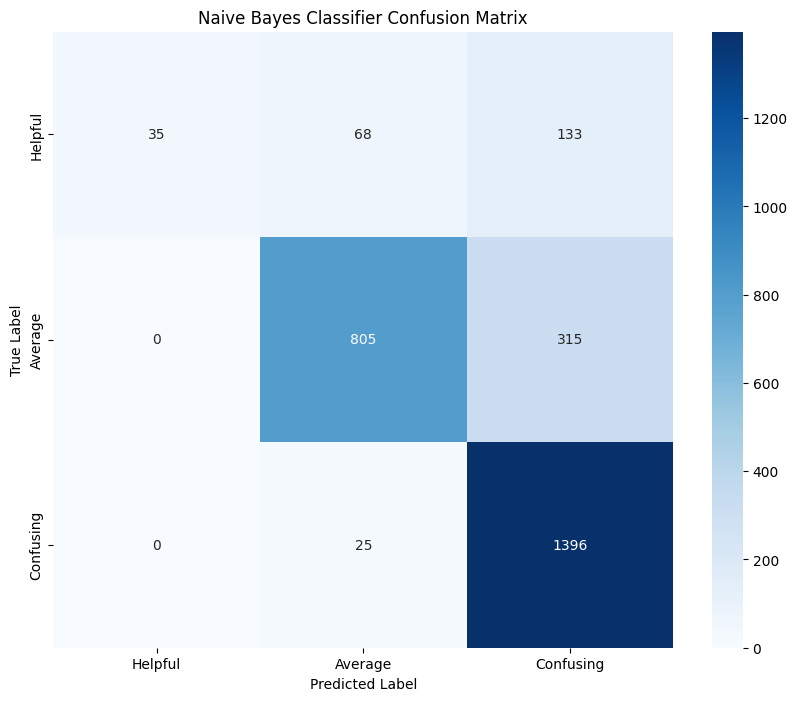


Classification Report:
              precision    recall  f1-score   support

     Average       1.00      0.15      0.26       236
   Confusing       0.90      0.72      0.80      1120
     Helpful       0.76      0.98      0.86      1421

    accuracy                           0.81      2777
   macro avg       0.88      0.62      0.64      2777
weighted avg       0.83      0.81      0.78      2777



In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d',
            cmap='Blues',
            xticklabels=['Helpful', 'Average', 'Confusing'],
            yticklabels=['Helpful', 'Average', 'Confusing'])
plt.title('Naive Bayes Classifier Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(class_report)

In [22]:

# Calculate video statistics using the new predictions
video_stats = pd.DataFrame({
    'Total_Comments': data.groupby(['Title', 'Video Link']).size(),
    'Helpful_Comments': data[data['Predicted_Sentiment'] == 'Helpful'].groupby(['Title', 'Video Link']).size()
}).reset_index()

# Calculate percentage of helpful comments
video_stats['Helpful_Percentage'] = (video_stats['Helpful_Comments'] / video_stats['Total_Comments'] * 100).round(2)

# Sort by percentage of helpful comments (descending)
video_stats = video_stats.sort_values('Helpful_Percentage', ascending=False)

In [23]:

# Get helpful comments with confidence scores
helpful_comments = data[data['Predicted_Sentiment'] == 'Helpful']
helpful_proba = nb_classifier.predict_proba(X)
data['Confidence_Score'] = np.max(helpful_proba, axis=1)


In [24]:
# Get top comments based on classifier confidence
video_comments_dict = {}
for _, row in video_stats.iterrows():
    title = row['Title']
    link = row['Video Link']
    # Get comments for this video and sort by confidence score
    # Filter helpful_comments based on title and link, then sort
    video_comments = data[
        (data['Title'] == title) &
        (data['Video Link'] == link) &
        (data['Predicted_Sentiment'] == 'Helpful')  # Filter for helpful comments
    ].sort_values('Confidence_Score', ascending=False)

    # Take top 3 comments
    top_3_comments = video_comments.head(3)['cleaned_comments'].tolist()

    # Join comments with their ranking
    formatted_comments = [f"{i+1}. {comment}" for i, comment in enumerate(top_3_comments)]
    video_comments_dict[(title, link)] = ' | '.join(formatted_comments)

# Add aggregated top 3 comments to video_stats
video_stats['Comments_of_User'] = video_stats.apply(
    lambda row: video_comments_dict.get((row['Title'], row['Video Link']), ''),
    axis=1
)

In [25]:
# Filter and save results
filtered_video_stats = video_stats[video_stats['Helpful_Percentage'] > 5]
filtered_video_stats.to_csv('Useful_YouTube_Content.csv', index=False)

print("\nResults Preview:")
print("===============")
print(filtered_video_stats[['Title', 'Helpful_Percentage', 'Comments_of_User']].head())



Results Preview:
                                                 Title  Helpful_Percentage  \
165  How I&#39;d Learn Data Analytics in 2024 (If I...               100.0   
236  My *honest* advice to any aspiring Data Analys...               100.0   
215  Is Data Analytics Really That Hard? Tips for R...               100.0   
92   Data Science Full Course - 12 Hours | Data Sci...               100.0   
219  Is The Google Data Analytics Certification Wor...               100.0   

                                      Comments_of_User  
165  1. great tip throughout video curious others m...  
236  1. hey rohan thank much showing true picture t...  
215  1. really love way video break data analytics ...  
92   1. thanks edureka great course provide note co...  
219  1. thank awesome review video yes great thing ...  


In [26]:
data['Sentiment_Scores'] = data['Comment Text'].apply(get_initial_labels)


def extract_sentiment_scores(scores_dict):
    # Assuming get_initial_labels returns a dictionary with keys 'neg', 'neu', 'pos'
    if isinstance(scores_dict, dict):
        return scores_dict.get('pos', 0), scores_dict.get('neg', 0), scores_dict.get('neu', 0)  # Provide default value if key not found
    else:
        return 0, 0, 0  # Return 0 for all scores if scores_dict is not a dictionary
data[['Positive', 'Negative', 'Neutral']] = data['Sentiment_Scores'].apply(extract_sentiment_scores).apply(pd.Series)


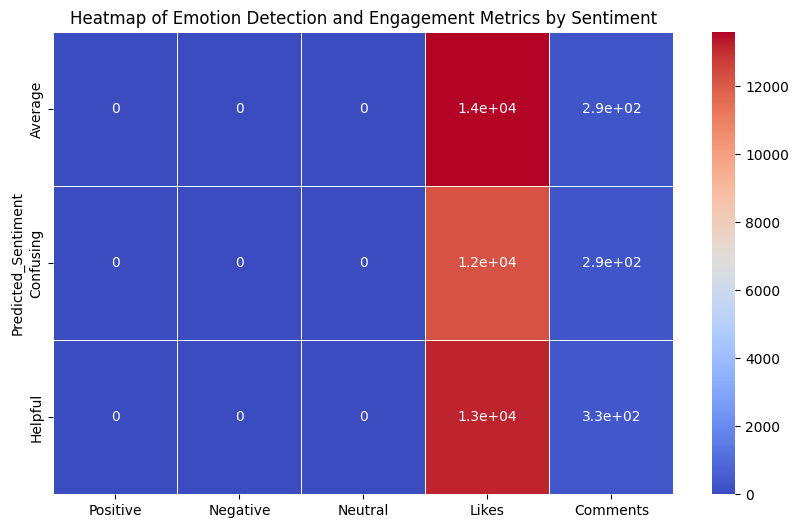

In [27]:
engagement_data = data.groupby('Predicted_Sentiment')[['Positive', 'Negative', 'Neutral', 'Likes', 'Comments']].mean()

plt.figure(figsize=(10, 6))
sns.heatmap(engagement_data, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Emotion Detection and Engagement Metrics by Sentiment')
plt.show()


C:\Users\gchan\AppData\Local\Temp\ipykernel_7424\825570236.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set1')


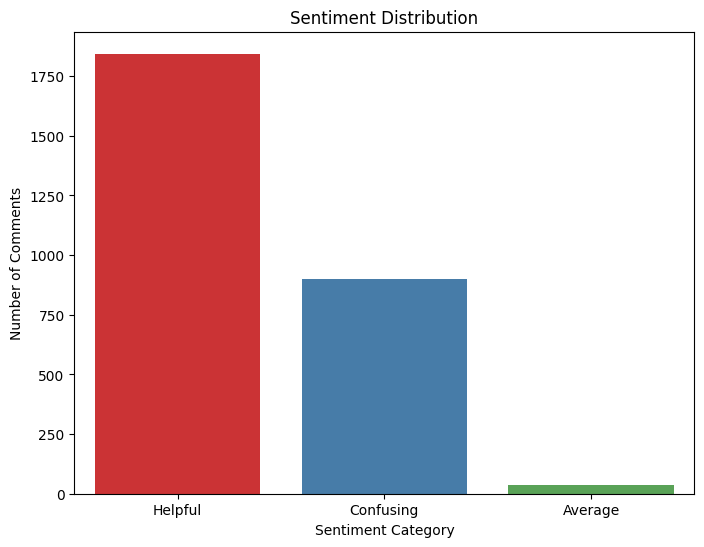

In [28]:
plt.figure(figsize=(8, 6))
sentiment_counts = data['Predicted_Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Set1')
plt.title('Sentiment Distribution')
plt.ylabel('Number of Comments')
plt.xlabel('Sentiment Category')
plt.show()

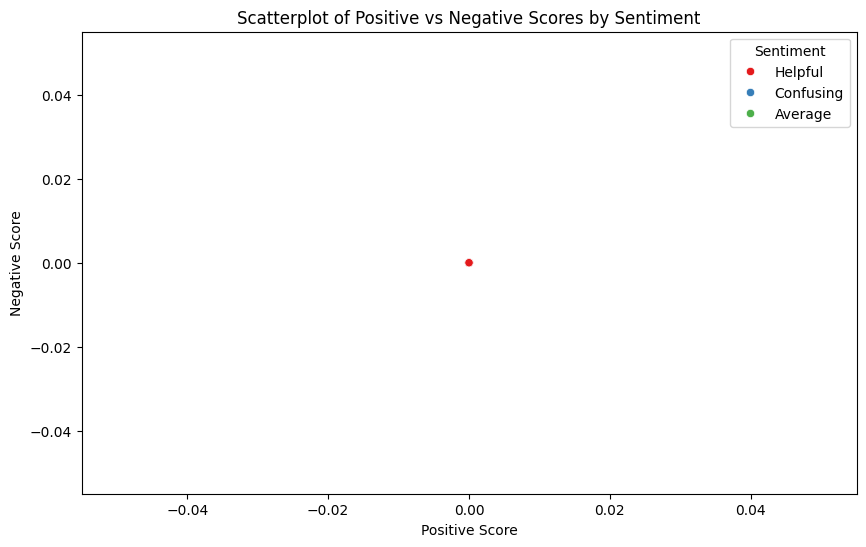

In [29]:
# Scatter plot visualization for Helpful, Average, Confusing score distributions
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Positive'], y=data['Negative'], hue=data['Predicted_Sentiment'], palette='Set1')
plt.title('Scatterplot of Positive vs Negative Scores by Sentiment')
plt.xlabel('Positive Score')
plt.ylabel('Negative Score')
plt.legend(title='Sentiment')
plt.show()